In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
import warnings
# import seaborn as sns

# Supressing future warnings that are irrelevant in our case.
warnings.filterwarnings('ignore')

# Displaying all graphs in the notebook.
%matplotlib inline

In [138]:
df = pd.read_csv("./netflix_titles_nov_2019.csv")
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [139]:
#Exploring the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [140]:
df.describe()

,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


In [141]:
features=list(df.keys())

In [142]:
features

['show_id',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'type']

#### Finding if the dataset contains null values

In [143]:
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [144]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [145]:
df.describe(include='object')

,title,director,cast,country,date_added,rating,duration,listed_in,description,type
count,5837,3936,5281,5410,5195,5827,5837,5837,5837,5837
unique,5780,3108,5087,527,1092,14,194,449,5829,2
top,Tunnel,"Raúl Campos, Jan Suter",David Attenborough,United States,"November 1, 2019",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...,Movie
freq,3,18,18,1907,94,1937,1259,297,3,3939


In [146]:
# type column have only 2 kind of values so we will convert it into category datatype
df['type'] = df['type'].astype('category')
df['type'].dtype

CategoricalDtype(categories=['Movie', 'TV Show'], ordered=False)

### Checking for duplicates

In [147]:
# checking entire row is duplicating or not
df.duplicated().sum()

0

In [148]:
# Checking shows are duplicating or not
df['title'].duplicated().sum()

57

## SELF NOTE
### Don't do below removal of duplicated values cause they are not duplicated.

In [149]:
# df[df['title'].duplicated()]               # they are not movies so we will drop them and their original movie also

In [150]:
# droing duplicated and wrong values from dataframe
# df.drop(df[df['title'].duplicated(keep=False)].index, inplace=True)
# df['title'].duplicated().sum()                                           # after dropping, check

In [194]:
dups=df.duplicated(['title'])
df[dups]['title']

212                   Drive
1244              Supergirl
1741                 Sarkar
2803                One Day
3214            Us and Them
3587           The Outsider
3593                  Benji
3660                   Solo
3671            The Silence
3672            The Silence
4339                   Love
4455              The Saint
4691                 Prince
4868          We Are Family
4951            Blood Money
5057                  Tiger
5063    People You May Know
5124             The Lovers
Name: title, dtype: object

In [195]:
for i in df[dups]['title'].values:
    print(df[df['title']==i][['title','type','release_year','country']])
    print('-'*40)

     title   type  release_year        country
101  Drive  Movie          2011  United States
212  Drive  Movie          2019          India
----------------------------------------
          title     type  release_year         country
492   Supergirl    Movie          1984  United Kingdom
1244  Supergirl  TV Show          2019   United States
----------------------------------------
       title   type  release_year country
1740  Sarkar  Movie          2018   India
1741  Sarkar  Movie          2018   India
----------------------------------------
        title   type  release_year        country
2227  One Day  Movie          2011  United States
2803  One Day  Movie          2016       Thailand
----------------------------------------
            title   type  release_year         country
3117  Us and Them  Movie          2017  United Kingdom
3214  Us and Them  Movie          2018           China
----------------------------------------
             title   type  release_year        c

### This above code has duplicate titles but these are actually unique movies/ shows with same title by chance, thats why we won't be removing them
### (answer for why we didn't discarded the duplicates before)

## Data Cleaning

In [151]:
df.nunique()

show_id         5837
title           5780
director        3108
cast            5087
country          527
date_added      1092
release_year      71
rating            14
duration         194
listed_in        449
description     5829
type               2
dtype: int64

#### Dropping the cast and director features because we are not going to use those features right now.


In [152]:
df = df.dropna( how='any',subset=['cast', 'director'])

#### Replacing null values with ‘missing’

In [153]:

df['country'].fillna('Missing',inplace=True)
df['date_added'].fillna('Missing',inplace=True)
df['rating'].fillna('Missing',inplace=True)
df.isnull().sum().sum()

0

In [154]:
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [155]:
# Renaming the ‘listed_in’ feature to the genre for easy use.

df = df.rename(columns={"listed_in":"genre"})
df['genre'] = df['genre'].apply(lambda x: x.split(",")[0])
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,genre,description,type,season_count
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Missing,"November 30, 2019",2019,TV-G,67,Documentaries,"From Sierra de las Minas to Esquipulas, explor...",Movie,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135,Comedies,A goofy copywriter unwittingly convinces the I...,Movie,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106,Dramas,"Arranged to marry a rich man, young Ada is cru...",Movie,
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107,Comedies,Nollywood star Ramsey Nouah learns that someon...,Movie,
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81,Dramas,"Romance, mystery and adventure intertwine as a...",Movie,


In [156]:
# After data cleaning the dataset look like this

df.describe(include='O')

,title,director,cast,country,date_added,rating,duration,genre,description,season_count
count,3588,3588,3588,3588,3588,3588,3588,3588,3588,3588
unique,3570,2821,3464,407,955,15,171,30,3580,11
top,The Silence,"Raúl Campos, Jan Suter",Samuel West,United States,"November 1, 2019",TV-MA,,Dramas,A surly septuagenarian gets another chance at ...,
freq,3,18,10,1221,79,1183,101,988,3,3487


### Printing the number of total productions in the dataframe and the proportions of movies and TV shows in %.

In [157]:
production_count = df['type'].value_counts(normalize=True)
print('Total productions: {}\n'.format(df.shape[0]))
print('Type of production\n{}: {:.2f}%\n{}: {:.2f}%'.format(production_count.index[0], production_count[0] * 100, production_count.index[1], production_count[1] * 100))

Total productions: 3588

Type of production
Movie: 97.19%
TV Show: 2.81%


In [158]:
# Splitting the countries into a list and selecting only the first country as the primary country of production.
df['country'] = df['country'].str.split(', ').fillna('no country').apply(lambda x: x[0])
# Doing some additional cleaning and replacing rows with no countriies with missing values.
df['country'] = df['country'].str.replace(',', '').str.replace('West Germany', 'Germany').replace('n', np.nan)

# Taking a look at the first few rows of the dataset.
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,genre,description,type,season_count
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Missing,"November 30, 2019",2019,TV-G,67,Documentaries,"From Sierra de las Minas to Esquipulas, explor...",Movie,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135,Comedies,A goofy copywriter unwittingly convinces the I...,Movie,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",France,"November 29, 2019",2019,TV-14,106,Dramas,"Arranged to marry a rich man, young Ada is cru...",Movie,
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107,Comedies,Nollywood star Ramsey Nouah learns that someon...,Movie,
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81,Dramas,"Romance, mystery and adventure intertwine as a...",Movie,


##### This is how our dataset looks after cleaning. 

In [159]:
# Grouping the dataset by country and counting the productions for each.
netflix_top_countries = df.groupby('country').agg({'title':'count'})
netflix_top_countries.columns = ['count']
netflix_top_countries = netflix_top_countries.sort_values(by='count', ascending=False)
# Displaying the top 10 countries.
print(netflix_top_countries.head(10))

                count
country              
United States    1368
India             656
United Kingdom    232
Canada            110
Missing           106
Spain              90
France             89
Hong Kong          70
Turkey             63
Mexico             59


##### Looks like the overwhelming majority of productions come from the US.

[]

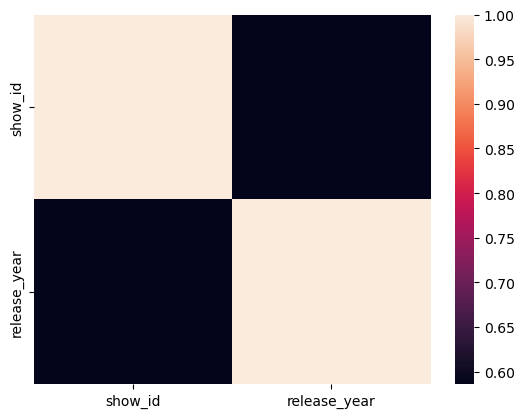

In [160]:
sns.heatmap(df.corr())
plt.plot()

### Data Investigation

In [161]:
def data_inv(df):
    print('netflix movies and shows: ',df.shape[0])
    print('dataset variables: ',df.shape[1])
    print('-'*30)
    print('dateset columns: \n')
    print(df.columns)
    print('-'*30)
    print('data-type of each column: \n')
    print(df.dtypes)
    print('-'*30)
    print('missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
data_inv(df)

netflix movies and shows:  3588
dataset variables:  13
------------------------------
dateset columns: 

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description', 'type',
       'season_count'],
      dtype='object')
------------------------------
data-type of each column: 

show_id            int64
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating            object
duration          object
genre             object
description       object
type            category
season_count      object
dtype: object
------------------------------
missing rows in each column: 

Series([], dtype: int64)


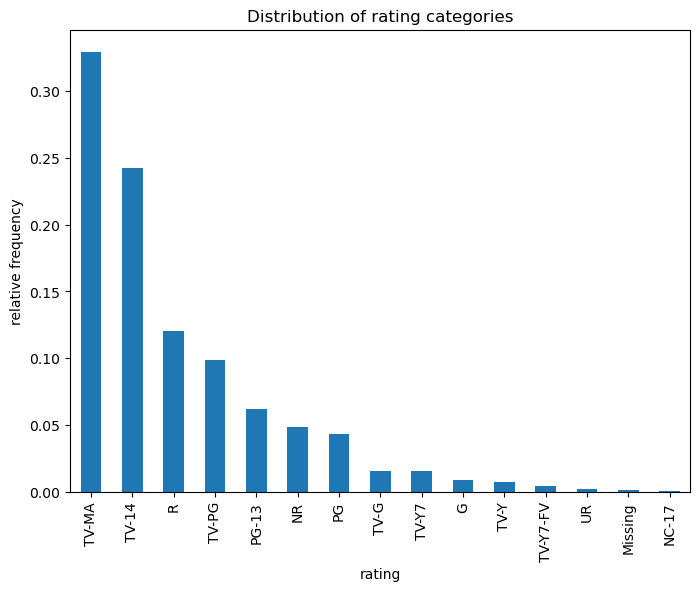

In [162]:
plt.figure(figsize=(8,6))
df['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

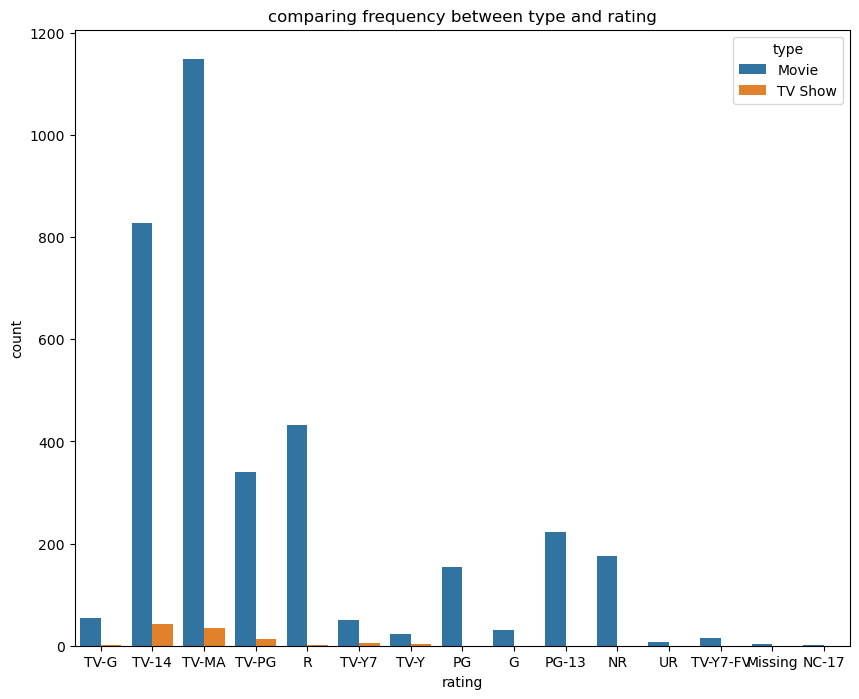

In [163]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('comparing frequency between type and rating')
plt.show()

In [164]:
df['country'].value_counts().sort_values(ascending=False)

United States     1368
India              656
United Kingdom     232
Canada             110
Missing            106
                  ... 
Lebanon              1
Soviet Union         1
Finland              1
Slovenia             1
Croatia              1
Name: country, Length: 69, dtype: int64

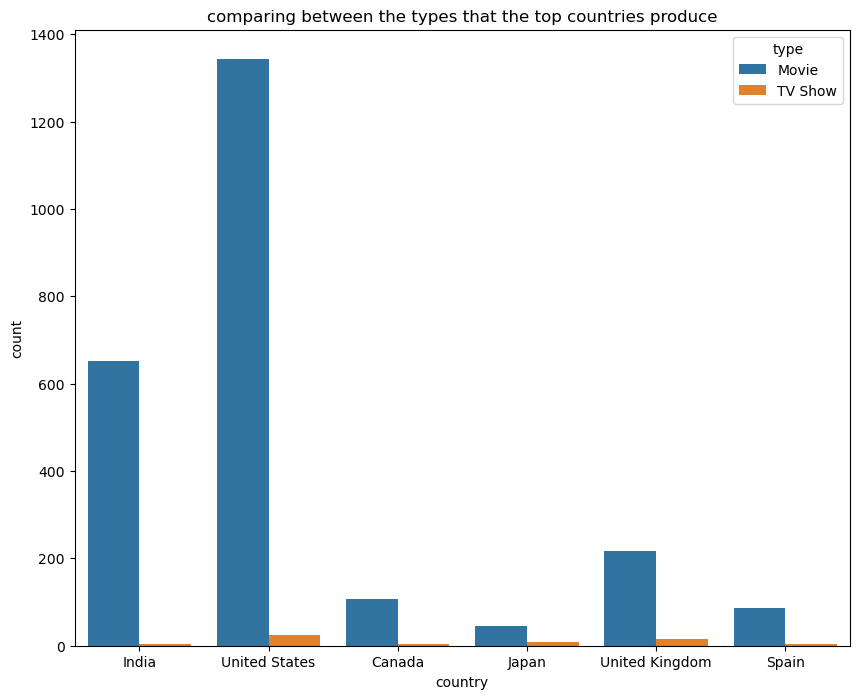

In [165]:
top_productive_countries=df[(df['country']=='United States')|(df['country']=='India')|(df['country']=='United Kingdom')|(df['country']=='Japan')|
                             (df['country']=='Canada')|(df['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

In [166]:
for i in top_productive_countries['country'].unique():
    print(i)
    print(top_productive_countries[top_productive_countries['country']==i]['rating'].value_counts(normalize=True)*100)
    print('-'*10)

India
TV-14       51.829268
TV-MA       24.695122
TV-PG       17.682927
NR           2.896341
PG-13        0.609756
TV-Y7        0.609756
TV-Y7-FV     0.457317
PG           0.457317
R            0.304878
TV-G         0.304878
UR           0.152439
Name: rating, dtype: float64
----------
United States
TV-MA       27.485380
R           20.102339
PG-13       12.280702
TV-14       11.622807
PG           8.187135
TV-PG        7.383041
NR           4.970760
TV-G         2.266082
TV-Y7        1.900585
G            1.754386
TV-Y         1.169591
TV-Y7-FV     0.438596
UR           0.219298
Missing      0.219298
Name: rating, dtype: float64
----------
Canada
TV-MA       34.545455
R           19.090909
TV-14       12.727273
TV-PG        9.090909
PG           7.272727
NR           6.363636
TV-G         2.727273
PG-13        2.727273
G            1.818182
TV-Y7        1.818182
TV-Y7-FV     0.909091
TV-Y         0.909091
Name: rating, dtype: float64
----------
Japan
TV-14    42.592593
NR       20.37

In [167]:
df['type'].value_counts(normalize=True)*100

Movie      97.185061
TV Show     2.814939
Name: type, dtype: float64

### Data Visualization


#### Now if we look at the data, we have some questions ready like

- What is the ratio of Movie and TV Shows on Netflix
- Distribution of Rating in Netflix
- Which has the highest rating Tv Shows or Movies on Netflix
- There are many more questions that we can answer we will see them in further blogs.

#### Viewing the correlation between the features.


In [168]:
# Heatmap
# Correlation between the feature show with the help of visualisation
corrs = df.corr()
fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title= 'Correlation of whole Data',  
                          plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                          title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                          font=dict(color='#8a8d93'))

#### This chart will tell us about the most-watched show on Netflix.

The reason for plotting the chart?

Which will tell us about what the audience prefers to watch. 
So Netflix can decide what type of content they should publish to make the audience happy.

In [169]:
fig_donut = px.pie(df, names='type', height=300, width=600, hole=0.7,

title='Most watched on Netflix',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))

#### Well, audience prefers Movies over TV Show as 97% audience like Movies.



#### Distribution of Rating and finding what audience prefer to watch.

The reason for plotting the chart?

To know which type of content is most watched by the audience so that Netflix can decide what type of content to be released next. It helps Netflix to understand the most and least favourite content watched by an audience.

In [170]:
df_rating = pd.DataFrame(df['rating'].value_counts()).reset_index().rename(columns={'index':'rating','rating':'count'})

fig_bar = px.bar(df_rating, y='rating', x='count', title='Distribution of Rating',

color_discrete_sequence=['#b20710'], text='count')

fig_bar.update_xaxes(showgrid=False)

fig_bar.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)

fig_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig_bar.update_layout(margin=dict(t=80, b=0, l=70, r=40),

hovermode="y unified",

xaxis_title=' ', yaxis_title=" ", height=400,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(color='#8a8d93'),

legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),

hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif")) 

#### Interpreting the chart
The audience prefers TV-MA and TV-14 shows more and the least preferred rating shows are Nc-17.  Most of the content watched by the audience is for a mature audience. The TV-MA rating is a type of rating given by the TV parental guidelines to a television program.

The second largest type of rating watched by the audience is TV-14 which is inappropriate for children younger than age 14. The conclusion is drawn here is most of the audience is of mature age. For more tricks and tips to make the bar chart interesting give a look here.

#### We will see which has the highest rating TV Shows or Movies.

The reason for plotting the chart?

I have used a bidirectional bar chart here to show the comparison between the TV shows and Movies vs Ratings. Creating two different bar charts one for TV Show and another for Movie doesn’t make sense but combining a user can easily understand the difference.

In [171]:
# making a copy of df
dff = df.copy()
# making 2 df one for tv show and another for movie with rating 
df_tv_show = dff[dff['type']=='TV Show'][['rating', 'type']].rename(columns={'type':'tv_show'})
df_movie = dff[dff['type']=='Movie'][['rating', 'type']].rename(columns={'type':'movie'})
df_tv_show = pd.DataFrame(df_tv_show.rating.value_counts()).reset_index().rename(columns={'index':'tv_show'})
df_tv_show['rating_final'] = df_tv_show['rating'] 
# making rating column value negative
df_tv_show['rating'] *= -1
df_movie = pd.DataFrame(df_movie.rating.value_counts()).reset_index().rename(columns={'index':'movie'})

Here for the bi-directional chart, we will make 2 different data frames one for Movies and another one for TV Shows having ratings in them.

We are making 2 subplots and they are sharing the y-axis.

In [172]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_yaxes=True, horizontal_spacing=0)
# bar plot for tv shows
fig.append_trace(go.Bar(x=df_tv_show.rating, y=df_tv_show.tv_show, orientation='h', showlegend=True, 
                        text=df_tv_show.rating_final, name='TV Show', marker_color='#221f1f'), 1, 1)
# bar plot for movies
fig.append_trace(go.Bar(x=df_movie.rating, y=df_movie.movie, orientation='h', showlegend=True, text=df_movie.rating,
                        name='Movie', marker_color='#b20710'), 1, 2)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(title='Which has the highest rating TV shows or Movies?',
                  margin=dict(t=80, b=0, l=70, r=40),
                  hovermode="y unified", 
                  xaxis_title=' ', yaxis_title=" ",
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))
fig.add_annotation(dict(x=0.81, y=0.6, ax=0, ay=0,
                    xref = "paper", yref = "paper",
                    text= "97% people prefer Movies over TV Shows on Netflix. Large number of people watch TV-MA rating. Movies which are for mature audience."))
fig.add_annotation(dict(x=0.2, y=0.2, ax=0, ay=0,
                    xref = "paper", yref = "paper",
                    text= "3% people prefer TV Shows on Netflix. There is no inappropriate content for ages 17 and under in TV Shows."))

Bi-directional Bar Chart in Plotly

As you see here I have added text into the chart which gives the additional information to the user while reading the charts. It is a good practice to give additional information in the chart if needed.

#### Finding the highest watched genres on Netflix

The reason for plotting the chart

To know more about the distribution of genres and see which type of content do audience prefers to watch. So Netflix can decide and take movies or tv shows of the highest watched genres which will benefit Netflix in a long run.

In [173]:
df_genre = pd.DataFrame(df.genre.value_counts()).reset_index().rename(columns={'index':'genre', 'genre':'count'})
fig_tree = px.treemap(df_genre, path=[px.Constant("Distribution of Geners"), 'count','genre'])
fig_tree.update_layout(title='Highest watched Geners on Netflix',
                  margin=dict(t=50, b=0, l=70, r=40),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

TreeMap in Plotly

Drama is the highest preferred show by the audience then comes the comedy show and action show, the least preferred show is of LGBTQ movies.

<hr>
Let’s see how many movies were released over the years with a waterfall chart.

The reason for plotting the chart

We want to see what is the distribution of releases of a movie or tv show in terms of years. Do the releases increase or decrease with the years. We can easily compare if the release of movies is decreasing or increasing by year by year with the help of a waterfall chart.

Code

We will create a data frame that only consists of Movie shows



## Conclusion
We explore the Netflix dataset and saw how to clean the data and then jump into how to visualize the data. We saw some basic and advanced level charts of Plotly like Heatmap, Donut chart, Bar chart, Funnel chart, Bi-directional Bar chart, Treemap, Waterfall chart, Line chart.

## Univariate Analysis

### We will follow this order by column wise for univariate analysis

- Categorical
- Numerical

In [174]:
#type

df['type'].shape[0]

3588

In [175]:
df['type'].value_counts()

Movie      3487
TV Show     101
Name: type, dtype: int64

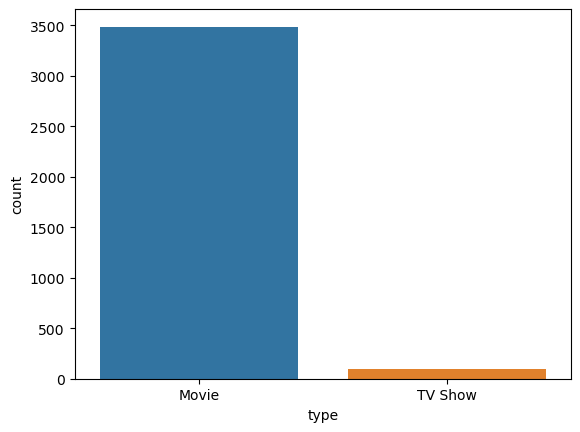

In [176]:
sns.countplot(x=df['type'])
plt.show()

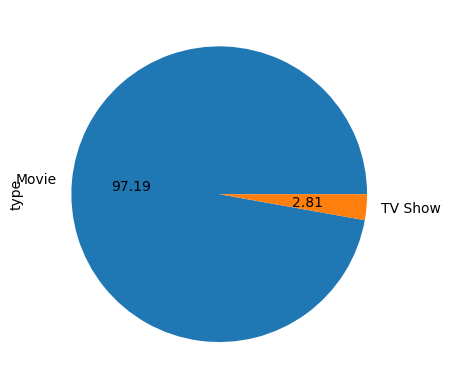

In [177]:
df['type'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [178]:
# nearly 97 percent are movies and 3 percent are TV Shows

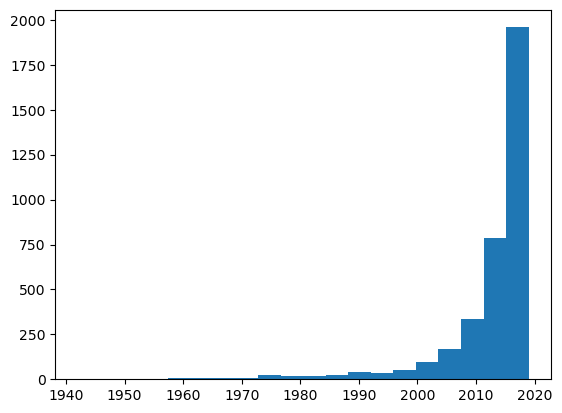

In [179]:
#release year
plt.hist(df['release_year'], bins=20)
plt.show()

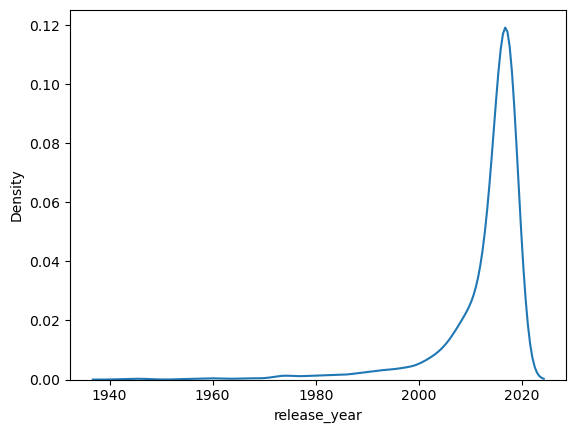

In [180]:
sns.distplot(df['release_year'], hist=False)
plt.show()

In [181]:
df['release_year'].describe()

count    3588.000000
mean     2012.714047
std         9.004949
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2017.000000
max      2019.000000
Name: release_year, dtype: float64

<AxesSubplot:>

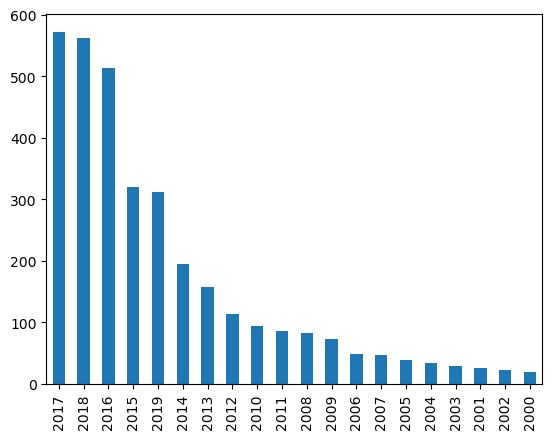

In [182]:
# top 20 release year in which maximun movie released
df['release_year'].value_counts().head(20).plot(kind='bar')

In [183]:
# Maximum movies are released in 2017

In [184]:
# duration
# There are two different type of durations for Movies it's in miniutes and for TV Shows it's in season

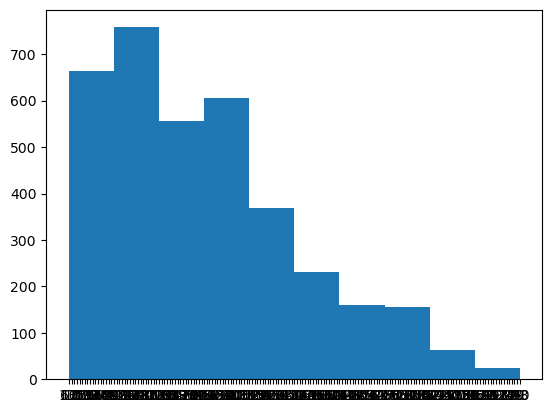

In [185]:
# first we will see about duration which is in `duration_min` from `Movie_df`

plt.hist(df['duration'])
plt.show()

In [186]:
df['duration'].describe()

count     3588
unique     171
top           
freq       101
Name: duration, dtype: object

### Top 10 movies based on release year from the given dataset

In [187]:
top_10_ratings = df[["title", "type", "release_year"]].sort_values(["title"], ascending=False)[:10]
top_10_ratings
fig = px.scatter(top_10_ratings, y= 'title', x='release_year', hover_data = top_10_ratings[['type','release_year','title']], color='type', 
                 title = "Top 10 High Rated Programs")
fig.show()

### Year-wise analysis

In [188]:
year = df.release_year.value_counts()
year

fig = px.bar(data_frame=df, x=year.index, y=year.values, labels={"y":"Movies", "x":"Year"})
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

### Runtime-based data analysis of Netflix dataset

In [189]:
fig = px.box(data_frame=df, x="duration", hover_data=df[["title", "type"]])
fig.update_traces(overwrite=True)
fig.show()

In [190]:
new = df.groupby('release_year')['show_id'].count().reset_index()
new.head()

,release_year,show_id
0,1942,1
1,1944,1
2,1945,1
3,1946,2
4,1947,1


<AxesSubplot:xlabel='release_year', ylabel='show_id'>

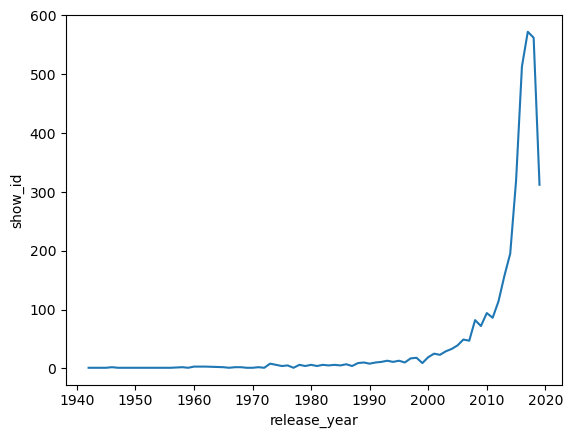

In [191]:
sns.lineplot(x=new['release_year'],y=new['show_id'])

### After 2000 the movies and Tv shows released more

## CONCLUSION –

#### We did data cleaning, replaced null values with missing.
#### Founds many insights that – 
- Top rating categories are TV-MA, TV-14
- frequency between type and rating
- Got to know that US is top productive country then comes India and so on.
- Analysed titles and there re-occurings among them. 
- Most watched on Netflix are 97% movies and 3% TV Shows
- Also, we found analysed the highest watched genre
- Univariate and bivariate analysis on – type, release year, rating, genre.
- After 2016 maximum movies are added in Netflix.
- After 2000 the movies and Tv shows released more.
